## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 25/III)

In [21]:
import pandas as pd
import requests
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#This part is for daily update the dataset.
df_domain_tot=pd.DataFrame()
df_bar=pd.DataFrame(columns = ["Day", "Total_Domain"])
df_bar_tot=pd.DataFrame()
start = datetime(2020,3,24)
finish = datetime.now() + timedelta(hours=15)
totalday = finish-start

for i in range(totalday.days):  
    start_edit=start.strftime('%Y-%m-%d')
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{start_edit}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    df_domain_tot=df_domain_tot.append(df_domain)
    print('The new domain in {} is: {}, Total domain number is: {}'.format(start_edit,(df_domain.shape[0]),(df_domain_tot.shape[0])))
    df_bar['Day'], df_bar["Total_Domain"] = [[start_edit], [df_domain.shape[0]]]
    df_bar_tot=df_bar_tot.append(df_bar)
    start += timedelta(days=1)
        
print('Finish')

df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_NL = df_domain[df_domain['Geold'] == 'NL']
df_NL.drop('Geold',1,inplace=True)
df_NL.drop(df_NL.tail(1).index,inplace=True) # drop last row 31-12-2019


df_NL.head(10)


The new domain in 2020-03-24 is: 6551, Total domain number is: 6551
The new domain in 2020-03-25 is: 6738, Total domain number is: 13289
Finish


,Cases,Deaths
DateRep,,
2020-03-25,811,63
2020-03-24,545,34
2020-03-23,573,43
2020-03-22,637,30
2020-03-21,534,30
2020-03-20,409,18
2020-03-19,346,34
2020-03-18,292,0
2020-03-17,278,4


In [23]:
df_NL.tail(10)

,Cases,Deaths
DateRep,,
2020-01-10,0,0
2020-01-09,0,0
2020-01-08,0,0
2020-01-07,0,0
2020-01-06,0,0
2020-01-05,0,0
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [24]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df_NL.shape

(85, 2)

In [26]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2020-03-25 to 2020-01-01
Data columns (total 2 columns):
Cases     85 non-null int64
Deaths    85 non-null int64
dtypes: int64(2)
memory usage: 2.0 KB


In [27]:
df_NL.isnull().sum()

Cases     0
Deaths    0
dtype: int64

In [28]:
df_NL.describe()

,Cases,Deaths
count,85.000000,85.000000
mean,65.411765,3.247059
std,161.784858,10.631160
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,10.000000,0.000000
max,811.000000,63.000000


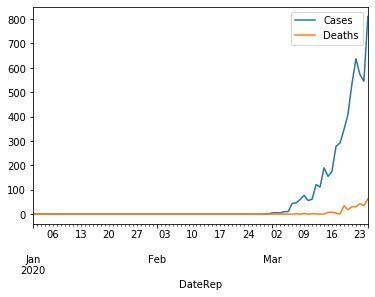

In [29]:
df_NL.resample('D').mean().plot()

276


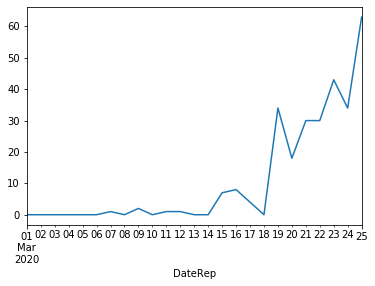

In [30]:
print(df_NL['Deaths'].sum())
df_NL.Deaths['2020-03'].resample('D').mean().plot()

Cases     5558
Deaths     276
dtype: int64


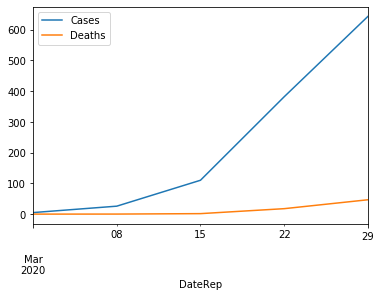

In [31]:
print(df_NL['2020-03'].sum())

df_NL['2020-03'].resample('W').mean().plot()

Cases     5558
Deaths     276
dtype: int64


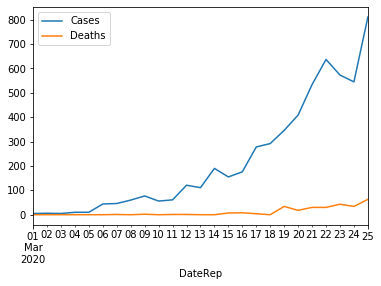

In [32]:
print(df_NL['2020-03'].sum())
df_NL['2020-03'].resample('D').mean().plot()